# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [29]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [30]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

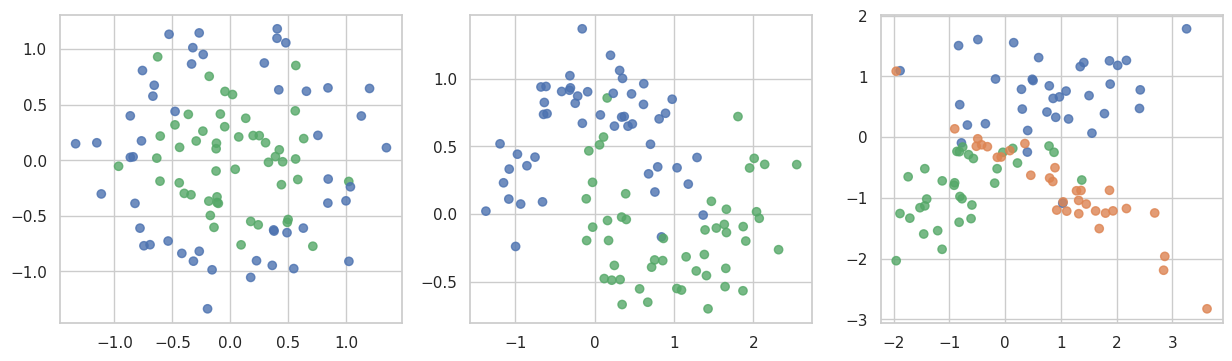

In [31]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [32]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

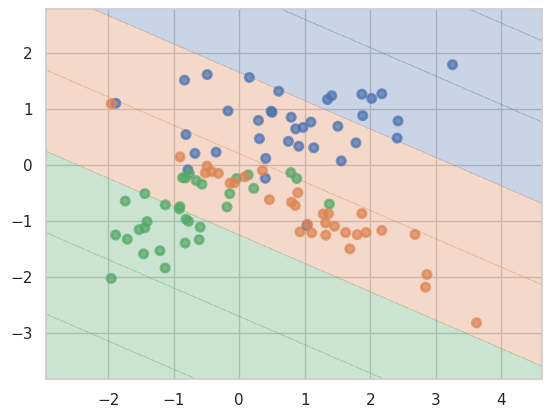

In [33]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [34]:
X_train_sets = []
X_test_sets = []
y_train_sets = []
y_test_sets = []

for x, y in datasets:
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  X_train_sets.append(X_train)
  X_test_sets.append(X_test)
  y_train_sets.append(y_train)
  y_test_sets.append(y_test)

In [35]:
trees = []

for X_train, y_train in zip(X_train_sets, y_train_sets):
  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  trees.append(tree)

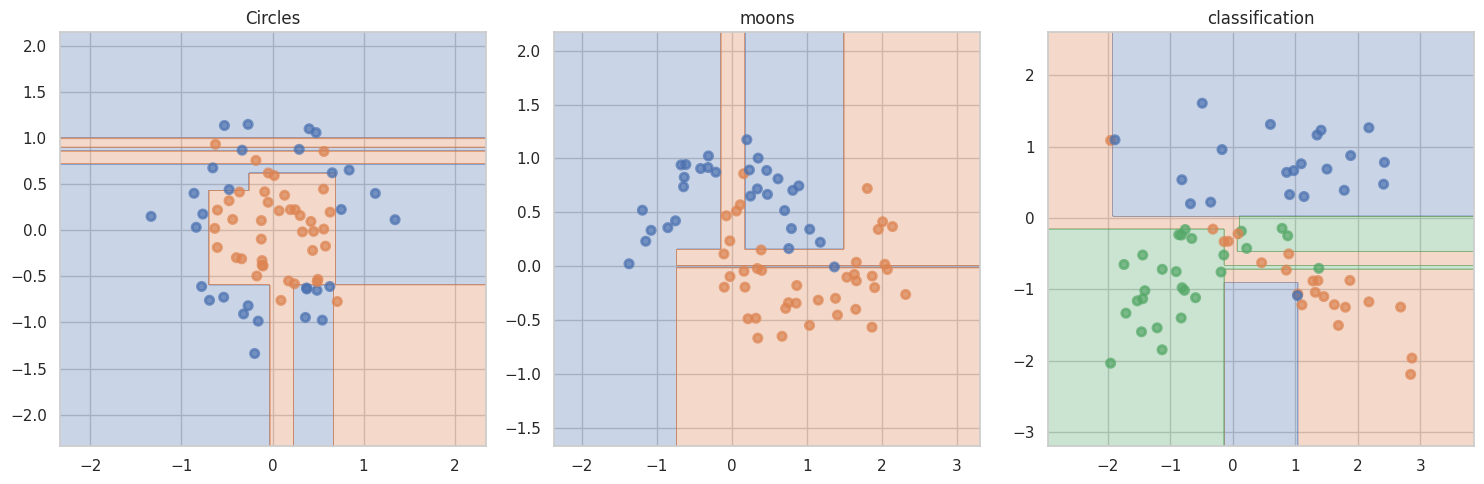

In [36]:
names = ['Circles', 'moons', 'classification']
plt.figure(figsize=(15, 5))

for i, (tree, X_train, y_train) in enumerate(zip(trees, X_train_sets, y_train_sets)):
  plt.subplot(1, 3, i+1)
  plot_surface(tree, X_train, y_train)
  plt.title(names[i])

plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import accuracy_score

for i, (tree, X_train, y_train, X_test, y_test) in enumerate(zip(trees, X_train_sets, y_train_sets, X_test_sets, y_test_sets)):
  train_accuracy = accuracy_score(y_train, tree.predict(X_train))
  test_accuracy = accuracy_score(y_test, tree.predict(X_test))
  print(f"{names[i]}: train_acc = {train_accuracy}, test_acc = {test_accuracy}")

Circles: train_acc = 1.0, test_acc = 0.7333333333333333
moons: train_acc = 1.0, test_acc = 0.8666666666666667
classification: train_acc = 1.0, test_acc = 0.7666666666666667


__Ответ:__
Деревья на всех датасетах сильно переобучились. Accuracy на трейн выборке везде 1, на тесте сильно меньше, а на графиках видно насколько сложными получились разделяющие области.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

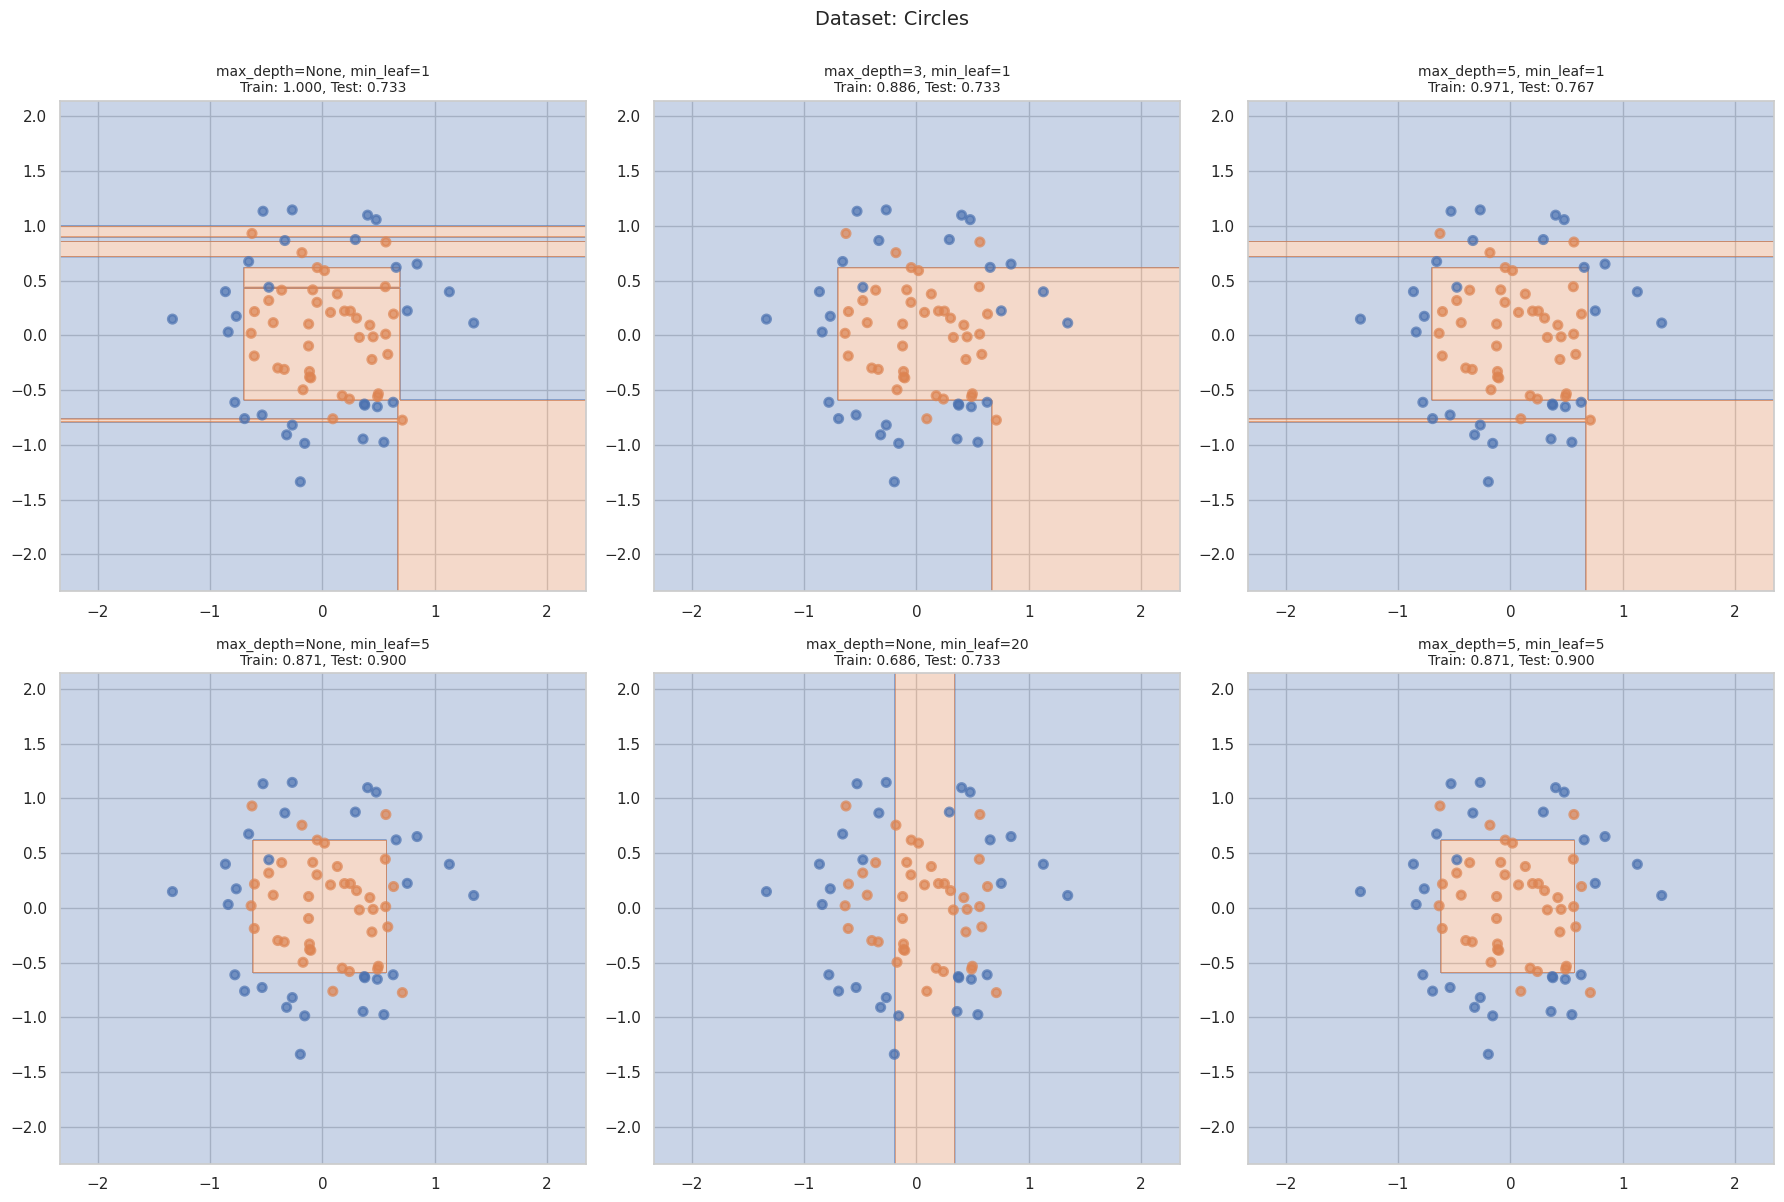

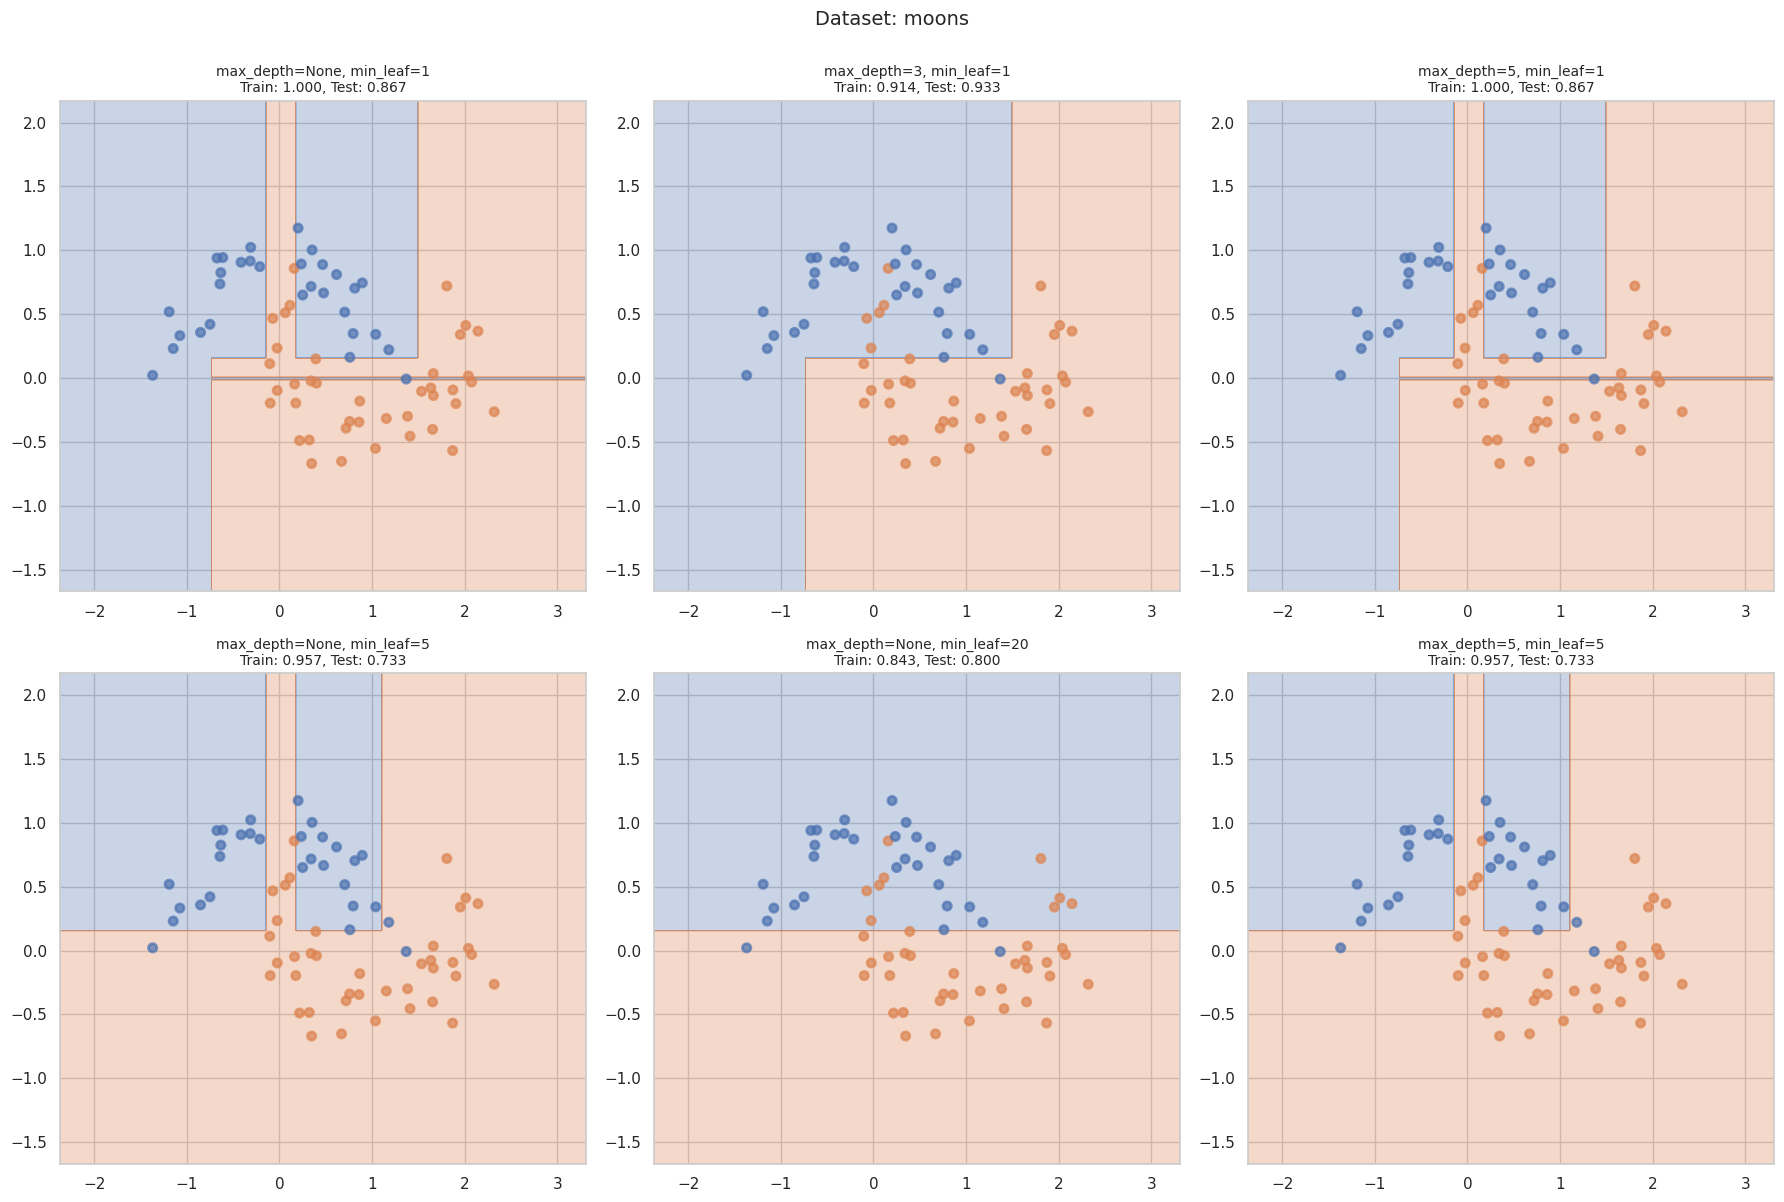

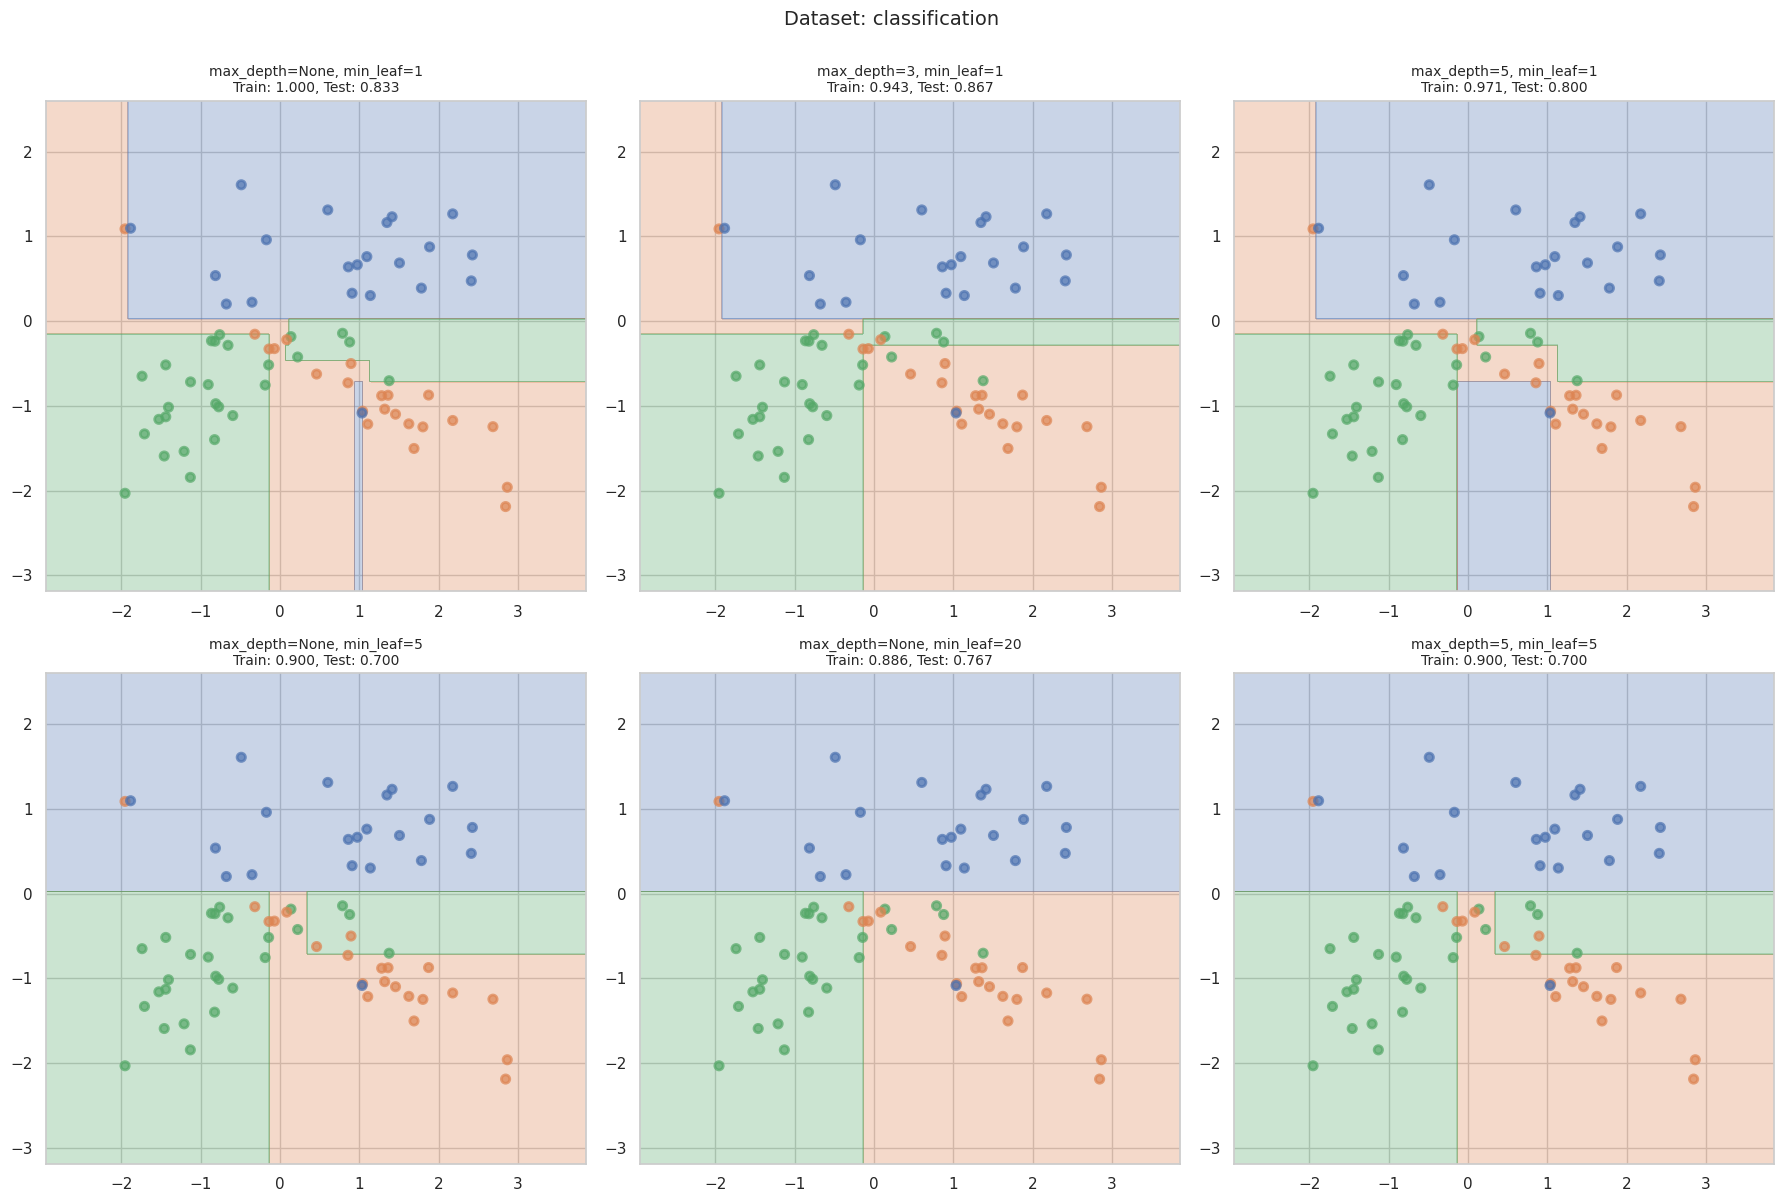

In [38]:
parameters = [{'max_depth': None, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 5},
    {'max_depth': None, 'min_samples_leaf': 20},
    {'max_depth': 5, 'min_samples_leaf': 5},]

for dataset_index, dataset_name in enumerate(names):
  X_train = X_train_sets[dataset_index]
  X_test = X_test_sets[dataset_index]
  y_train = y_train_sets[dataset_index]
  y_test = y_test_sets[dataset_index]

  fig, axes = plt.subplots(2, 3, figsize=(18, 12))
  axes = axes.ravel()

  for i, params in enumerate(parameters):
    tree = DecisionTreeClassifier(**params)
    tree.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, tree.predict(X_train))
    test_accuracy = accuracy_score(y_test, tree.predict(X_test))

    plt.sca(axes[i])
    plot_surface(tree, X_train, y_train)
    title = f"max_depth={params['max_depth']}, min_leaf={params['min_samples_leaf']}\n"
    title += f"Train: {train_accuracy:.3f}, Test: {test_accuracy:.3f}"
    plt.title(title, fontsize=10)

  plt.suptitle(f"Dataset: {dataset_name}", fontsize=14, y=1.00)
  plt.tight_layout()
  plt.show()

__Ответ:__
При использовании различных гиперпараметров разделяющие области становятся все глаже и глаже.

Чем **больше** max_depth, тем больше модель подстраивается под тренировачные данные и тем сложнее получается границы на графике.

Чем **меньше** min_samples_leaf, тем с меньшим количеством объектов модель может создавать листья => больше подстраивается под тренировачные данные, что приводит к переобучению.

Чем сложнее структура датасета, тем сложнее подбираются параметры под дерево.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [39]:
from hw2code import find_best_split

data = pd.read_csv('/content/students.csv')

print(data.head())
print(data.shape)
print(data.columns)

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0
(258, 6)
Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')


In [40]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
feature_names = data.columns[:-1]

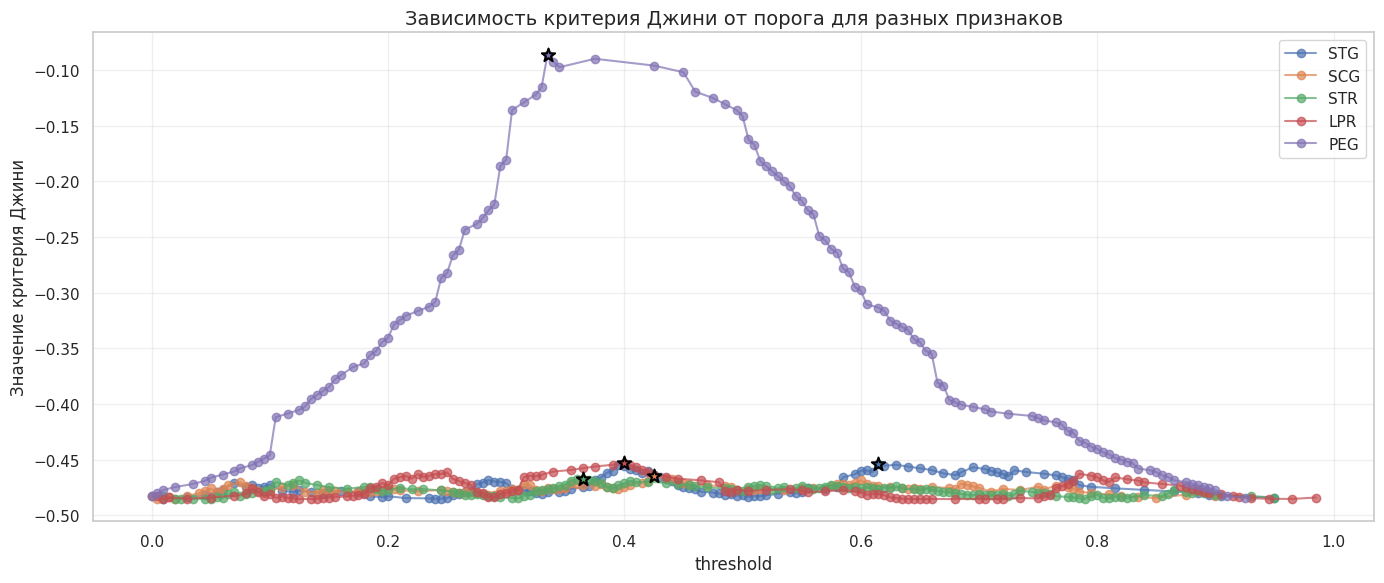

In [41]:
plt.figure(figsize=(14, 6))
for i in range(X.shape[1]):
  feature_vector = X[:, i]
  target_vector = y

  thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)

  plt.plot(thresholds, ginis, marker='o', label=feature_names[i], alpha=0.7)

  plt.scatter(threshold_best, gini_best, s=100, marker='*', edgecolors='black', linewidth=1.5, zorder=5)

plt.xlabel('threshold', fontsize=12)
plt.ylabel('Значение критерия Джини', fontsize=12)
plt.title('Зависимость критерия Джини от порога для разных признаков', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

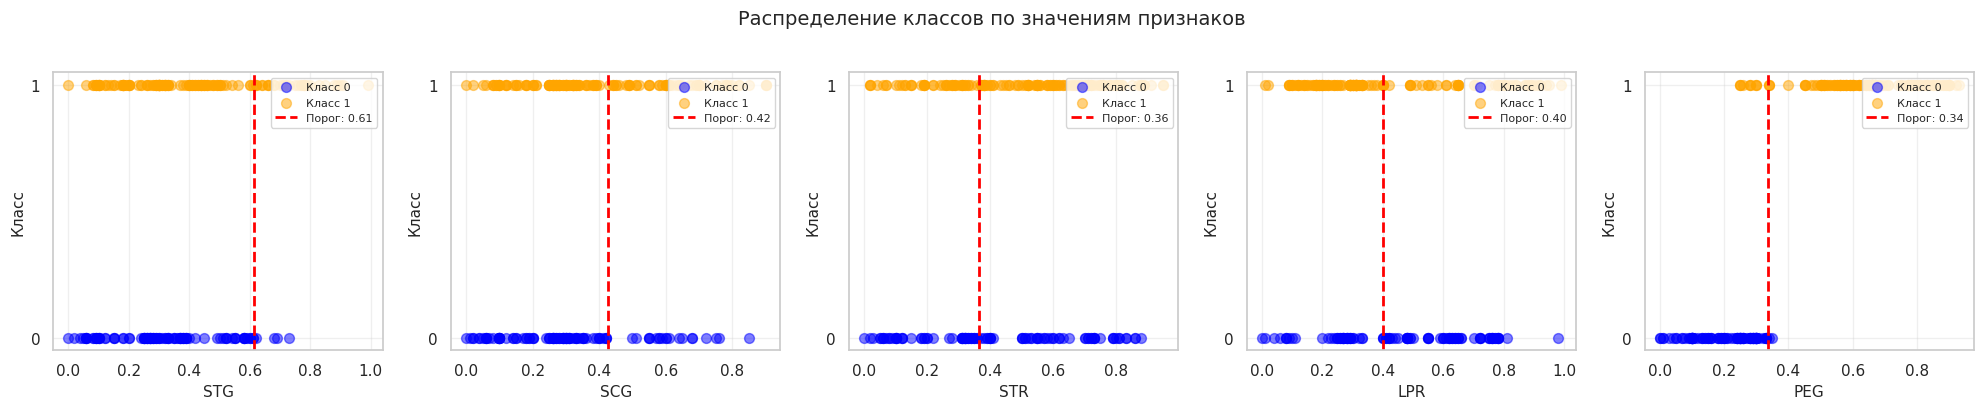

In [42]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(X.shape[1]):
  ax = axes[i]

  class_0 = X[y == 0, i]
  class_1 = X[y == 1, i]

  ax.scatter(class_0, np.zeros_like(class_0), alpha=0.5, label='Класс 0', s=50, color='blue')
  ax.scatter(class_1, np.ones_like(class_1), alpha=0.5, label='Класс 1', s=50, color='orange')

  _, _, threshold_best, _ = find_best_split(X[:, i], y)
  ax.axvline(threshold_best, color='red', linestyle='--', linewidth=2, label=f'Порог: {threshold_best:.2f}')

  ax.set_xlabel(f'{feature_names[i]}', fontsize=11)
  ax.set_ylabel('Класс', fontsize=11)
  ax.set_yticks([0, 1])
  ax.legend(loc='upper right', fontsize=8)
  ax.grid(True, alpha=0.3)

plt.suptitle('Распределение классов по значениям признаков', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Нужно производить деление выборки на два поддерева по признаку PEG. Результат с визуальной оценкой scatter-графиков полностью согласуется.

Для хороших признаков кривая имеет отчетливую вершину в определенной области порогов. Те признаки, по которым деление практически невозможно, имееют почти "плоские" кривые. Это значит что классы настолько перемешаны по этим признакам, что любое разбиение дает примерно одинаковый плохой результат.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [43]:
from sklearn.preprocessing import LabelEncoder
from hw2code import DecisionTree

data = pd.read_csv('/content/agaricus-lepiota.data', header=None)

print(data.head())

  0  1  2  3  4  5  6  7  8  9   ... 13 14 15 16 17 18 19 20 21 22
0  p  x  s  n  t  p  f  c  n  k  ...  s  w  w  p  w  o  p  k  s  u
1  e  x  s  y  t  a  f  c  b  k  ...  s  w  w  p  w  o  p  n  n  g
2  e  b  s  w  t  l  f  c  b  n  ...  s  w  w  p  w  o  p  n  n  m
3  p  x  y  w  t  p  f  c  n  n  ...  s  w  w  p  w  o  p  k  s  u
4  e  x  s  g  f  n  f  w  b  k  ...  s  w  w  p  w  o  e  n  a  g

[5 rows x 23 columns]


In [44]:
data_encoded = data.copy()

label_encoders = []
for col in data_encoded.columns:
  le = LabelEncoder()
  data_encoded[col] = le.fit_transform(data_encoded[col])
  label_encoders.append(le)

print(data_encoded.head())

   0   1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   1   5   2   4   1   6   1   0   1   4  ...   2   7   7   0   2   1   4   
1   0   5   2   9   1   0   1   0   0   4  ...   2   7   7   0   2   1   4   
2   0   0   2   8   1   3   1   0   0   5  ...   2   7   7   0   2   1   4   
3   1   5   3   8   1   6   1   0   1   5  ...   2   7   7   0   2   1   4   
4   0   5   2   3   0   5   1   1   0   4  ...   2   7   7   0   2   1   0   

   20  21  22  
0   2   3   5  
1   3   2   1  
2   3   2   3  
3   2   3   5  
4   3   0   1  

[5 rows x 23 columns]


In [45]:
X = data_encoded.iloc[:, 1:].values
y = data_encoded.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [46]:
features = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types=features)
tree.fit(X_train, y_train)

In [47]:
train_predictions = tree.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

test_predictions = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy:  {test_accuracy:.4f}")

Train accuracy: 1.0000
Test accuracy:  1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier

def label_encode_features(X_df):
    X_encoded = X_df.copy()
    encoders = []
    for col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        encoders.append(le)
    return X_encoded, encoders


def cv_accuracy_my_tree(X, y, feature_types, n_splits=10):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in cv.split(X, y):
        X_tr, X_te = X[train_idx], X[test_idx]
        y_tr, y_te = y[train_idx], y[test_idx]

        clf = DecisionTree(feature_types=feature_types)
        clf.fit(X_tr, y_tr)
        y_pred = clf.predict(X_te)
        scores.append(accuracy_score(y_te, y_pred))
    return float(np.mean(scores))


def cv_accuracy_my_tree_ohe(X_df, y, n_splits=10):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in cv.split(X_df, y):
        X_tr_raw = X_df.iloc[train_idx]
        X_te_raw = X_df.iloc[test_idx]

        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_tr = ohe.fit_transform(X_tr_raw)
        X_te = ohe.transform(X_te_raw)

        feature_types = ["real"] * X_tr.shape[1]
        clf = DecisionTree(feature_types=feature_types)
        clf.fit(X_tr, y[train_idx])
        y_pred = clf.predict(X_te)
        scores.append(accuracy_score(y[test_idx], y_pred))
    return float(np.mean(scores))


def cv_accuracy_sklearn_dt(X, y, n_splits=10):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    scores = cross_val_score(
        clf, X, y, cv=cv, scoring=make_scorer(accuracy_score)
    )
    return float(np.mean(scores))


In [49]:

mush_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mush = pd.read_csv(mush_url, header=None)

y_mush = (
    mush.iloc[:, 0]
    .astype(str)
    .map({"e": 0, "p": 1})
    .values
)
X_mush_raw = mush.iloc[:, 1:].astype(str)
X_mush_le, _ = label_encode_features(X_mush_raw)
X_mush = X_mush_le.values

tic_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
tic = pd.read_csv(tic_url, header=None)

y_tic_raw = tic.iloc[:, -1].astype(str).str.strip().str.lower()
y_tic = y_tic_raw.map({"positive": 1, "negative": 0, "true": 1, "false": 0}).values
X_tic_raw = tic.iloc[:, :-1].astype(str)
X_tic_le, _ = label_encode_features(X_tic_raw)
X_tic = X_tic_le.values

car_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars = pd.read_csv(car_url, header=None)

y_cars_raw = cars.iloc[:, -1].astype(str).str.strip()
y_cars = y_cars_raw.map(
    {"unacc": 0, "acc": 0, "good": 1, "vgood": 1}
).values
X_cars_raw = cars.iloc[:, :-1].astype(str)
X_cars_le, _ = label_encode_features(X_cars_raw)
X_cars = X_cars_le.values

nursery_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
nur = pd.read_csv(nursery_url, header=None)

y_nur_raw = nur.iloc[:, -1].astype(str).str.strip()
y_nur = y_nur_raw.map(
    {
        "not_recom": 0,
        "recommend": 0,
        "very_recom": 1,
        "priority": 1,
        "spec_prior": 1,
    }
).values
X_nur_raw = nur.iloc[:, :-1].astype(str)
X_nur_le, _ = label_encode_features(X_nur_raw)
X_nur = X_nur_le.values



datasets = {
    "mushrooms": (X_mush, X_mush_raw, y_mush),
    "tic-tac-toe": (X_tic, X_tic_raw, y_tic),
    "cars": (X_cars, X_cars_raw, y_cars),
    "nursery": (X_nur, X_nur_raw, y_nur),
}

results = {}

for name, (X_le, X_raw, y) in datasets.items():
    n_features = X_le.shape[1]

    feat_types_real = ["real"] * n_features
    acc_dt_real = cv_accuracy_my_tree(X_le, y, feat_types_real)

    feat_types_cat = ["categorical"] * n_features
    acc_dt_cat = cv_accuracy_my_tree(X_le, y, feat_types_cat)

    acc_dt_real_ohe = cv_accuracy_my_tree_ohe(X_raw, y)

    acc_sklearn_dt = cv_accuracy_sklearn_dt(X_le, y)

    results[name] = [
        acc_dt_real,
        acc_dt_cat,
        acc_dt_real_ohe,
        acc_sklearn_dt,
    ]

columns = [
    "DT_real",
    "DT_categorical",
    "DT_real_OHE",
    "sklearn_DT",
]

df_results = pd.DataFrame(results, index=columns).T
print(df_results)


              DT_real  DT_categorical  DT_real_OHE  sklearn_DT
mushrooms    0.988679        1.000000     0.997292    1.000000
tic-tac-toe  0.501031        0.942632     0.724452    0.888355
cars         0.942734        0.989007     0.943853    0.991891
nursery      0.999846        0.999846     0.999846    0.999691


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Нет, для разных наборов данных алгоритмы ранжируются по разному. Это происходит в силу природы признаков.
Наример, в таких датасетах, как mushrooms или nursery, все алгоритмы работают почти идеально, а вот на такой датасет, как tic-tac-toe, разница огромна: sklearn сильно выше любой из реализаций.

В результатах вашего эксперимента есть компонента случайности. Она проявляется при разбиении данных на 10 фолдов в кросс-валидации (разные объекты попадают в обучение и тест) и в алгоритме sklearn_DT, который при равном качестве разбиения выбирает признак случайно (если не зафиксирован random_state).

Чтобы снизить влияние случайности и улучшить результаты, нужно всегда фиксировать random_state при разбиении данных и инициализации моделей для воспроизводимости. Для повышения стабильности оценок можно использовать многократную кросс-валидацию (Repeated K-Fold).

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
Хорошая домашка